In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv("feature.csv",index_col=0)
print(data.shape)
data.head()

(4754, 51)


,trans_day_last_12_month,take_amount_in_later_12_month_highest,history_fail_fee,latest_query_day,consume_top_time_last_6_month,trans_activity_day,loans_score,trans_days_interval_filter,latest_one_month_fail,consume_mini_time_last_1_month,...,transd_mcc,avg_price_last_12_month,apply_score,latest_three_month_apply,trans_amount_increase_rate_lately,latest_one_month_suc,history_suc_fee,first_transaction_time,rank_trad_1_month,label
0,85.0,0,7.0,12.0,19.0,0.313,552.0,27.0,0.0,5.0,...,17.0,1020,583.0,5.0,0.90,1.0,37.0,20130817.0,0.40,1
1,84.0,2000,4.0,4.0,30.0,0.458,635.0,30.0,1.0,330.0,...,19.0,1210,653.0,6.0,1.28,2.0,49.0,20160402.0,0.35,0
2,95.0,0,2.0,2.0,68.0,0.114,633.0,68.0,1.0,0.0,...,13.0,570,654.0,5.0,1.00,1.0,2.0,20170617.0,1.00,1
3,82.0,2000,26.0,2.0,8.0,0.777,542.0,14.0,0.0,31700.0,...,22.0,1290,595.0,16.0,0.13,2.0,91.0,20130516.0,0.15,0
4,88.0,0,25.0,22.0,66.0,0.175,479.0,66.0,0.0,0.0,...,13.0,1110,541.0,8.0,0.46,0.0,36.0,20170312.0,0.65,1


In [5]:
y=data['label']
train=data.drop('label',axis=1)

In [7]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(train,y,test_size=0.3,random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,precision_score,accuracy_score
rf=RandomForestClassifier()
rf.fit(train_x,train_y)

pred=rf.predict(test_x)
print(precision_score(test_y,pred))
print(accuracy_score(test_y,pred))

0.6227544910179641
0.7701471618780659


In [18]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(max_depth=-1,n_estimators=1000,learning_rate=0.01)
lgb.fit(train_x,train_y)
pred=rf.predict(test_x)
print(precision_score(test_y,pred))
print(accuracy_score(test_y,pred))

0.6227544910179641
0.7701471618780659


任务4：记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）
关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier

In [29]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate,true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

0.0
0.7414155571128241
0.0
0.0


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


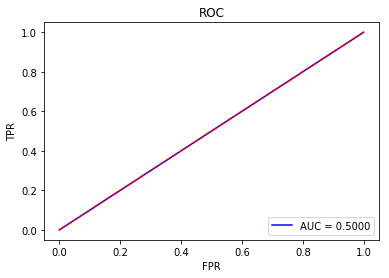

In [30]:
lr=LogisticRegression()
lr.fit(train_x,train_y)

pred2=lr.predict(test_x)
print(precision_score(test_y,pred))
print(accuracy_score(test_y,pred))
print(recall_score(test_y,pred))
print(f1_score(test_y,pred))
plot_roc(test_y,pred)

0.0
0.7414155571128241
0.0
0.0


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


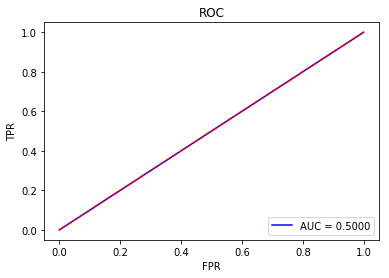

In [31]:
svc=SVC()
svc.fit(train_x,train_y)

pred3=svc.predict(test_x)
print(precision_score(test_y,pred))
print(accuracy_score(test_y,pred))
print(recall_score(test_y,pred))
print(f1_score(test_y,pred))
plot_roc(test_y,pred)

0.0
0.7414155571128241
0.0
0.0


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


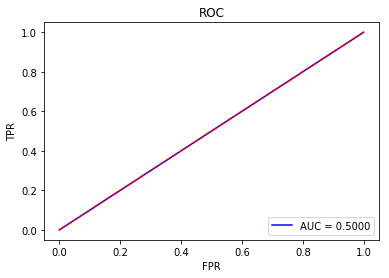

In [32]:
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)

pred4=dt.predict(test_x)
print(precision_score(test_y,pred))
print(accuracy_score(test_y,pred))
print(recall_score(test_y,pred))
print(f1_score(test_y,pred))
plot_roc(test_y,pred)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0
0.7414155571128241
0.0
0.0


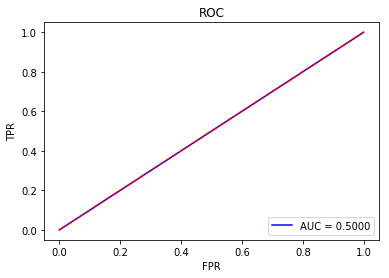

In [33]:

xgb=XGBClassifier()
xgb.fit(train_x,train_y)

pred5=xgb.predict(test_x)
print(precision_score(test_y,pred))
print(accuracy_score(test_y,pred))
print(recall_score(test_y,pred))
print(f1_score(test_y,pred))
plot_roc(test_y,pred)